In [1]:
import pandas as pd
from sunpy.map import Map
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
import plotly.express as px


In [2]:
df = pd.read_csv('091122-121122_final_full_flare_list.csv')
df_filtered = pd.read_csv('091122-121122_final_filtered_flare_list.csv')

In [15]:
len(df_filtered)

62

In [4]:
aia_maps = Map('/Users/hannahcollier/Downloads/JSOC_20230704_444/*image_lev1.fits')


<IPython.core.display.Javascript object>


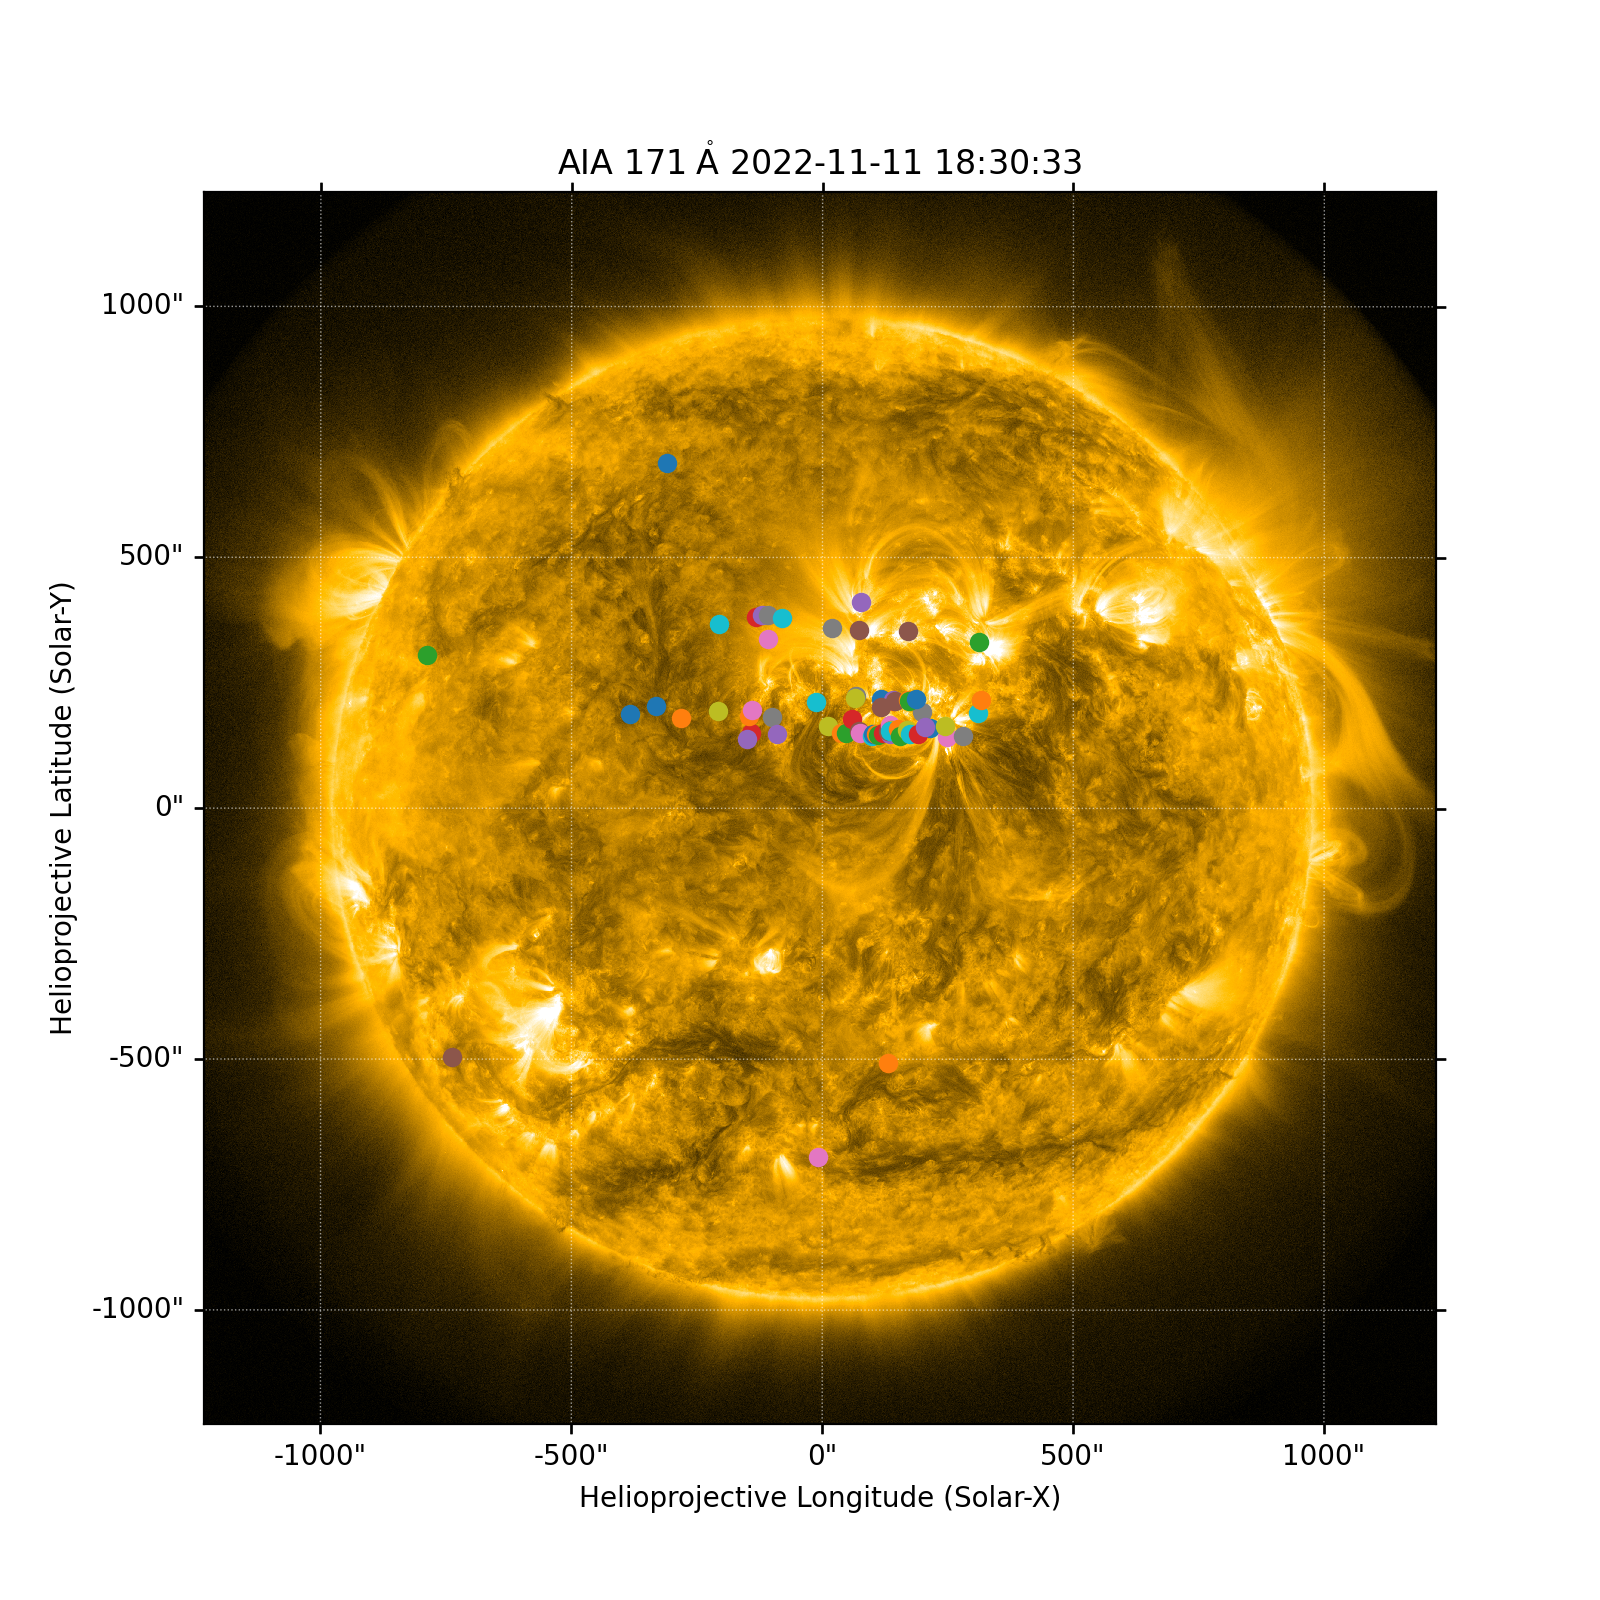

In [5]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=aia_maps[-1])
aia_maps[-1].plot(axes=ax, clip_interval=(1, 99.9)*u.percent)
for i in range(len(df)):
    x = df.iloc[i]['Earth X']
    y = df.iloc[i]['Earth Y']
    ax.plot_coord(SkyCoord(x*u.arcsec, y*u.arcsec, frame=aia_maps[-1].coordinate_frame),'o')
plt.show()

<IPython.core.display.Javascript object>


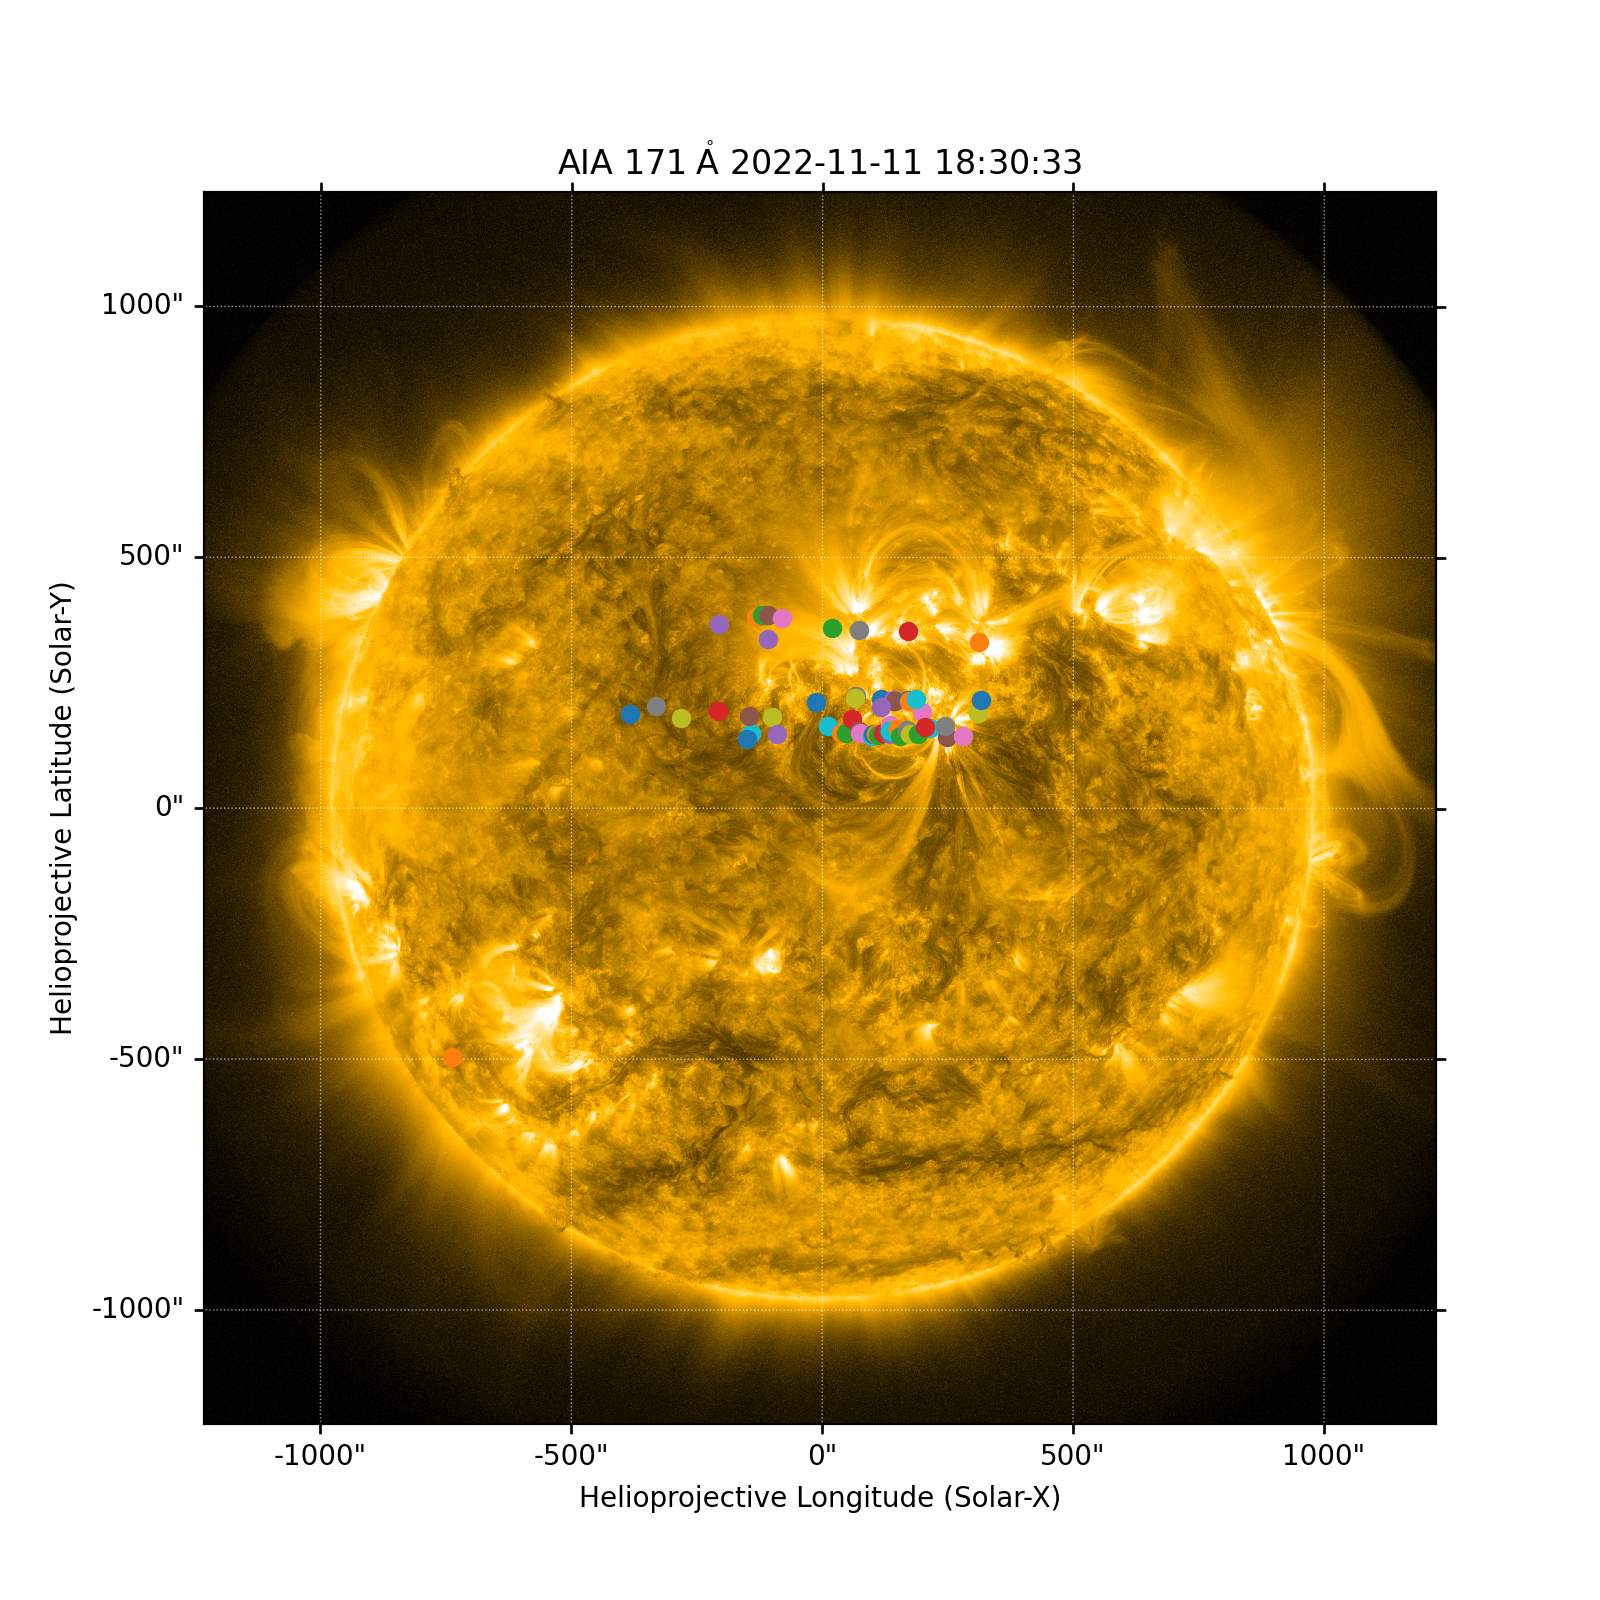

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=aia_maps[-1])
aia_maps[-1].plot(axes=ax, clip_interval=(1, 99.9)*u.percent)
for i in range(len(df_filtered)):
    x = df_filtered.iloc[i]['Earth X']
    y = df_filtered.iloc[i]['Earth Y']
    ax.plot_coord(SkyCoord(x*u.arcsec, y*u.arcsec, frame=aia_maps[-1].coordinate_frame),'o')
plt.savefig('./pngs/091122-121122_flares_in_AR_filtered.png',dpi=300)    
plt.show()

In [8]:
len(df_filtered)

62

In [9]:
fig = px.scatter(df, x="Earth X", y="Earth Y", color="GOES_class")
fig.update_traces(mode="markers+lines")

fig.show()

In [10]:
fig = px.scatter(df, x="Earth X", y="Earth Y", color="peak_UTC")
fig.update_traces(mode="markers+lines")

fig.show()

In [11]:
fig = px.scatter(df_filtered, x="Earth X", y="Earth Y", color="GOES_class")
fig.update_traces(mode="markers+lines")
fig.write_html("./pngs/091122-121122_filtered_flare_locations_given_GOES_class.html")

fig.show()

In [12]:
fig = px.scatter(df_filtered, x="Earth X", y="Earth Y", color="peak_UTC")
fig.update_traces(mode="markers+lines")
fig.write_html("./pngs/091122-121122_filtered_flare_locations_given_time.html")
fig.show()

In [ ]:
#flare happened at 20:00 on 09-10-22 at ~(-495,-737)
# AR near 3 "outlier" points on 09-11-22 - rotates from ~-400'' to 200'' during the two day period
# flare at (-788, 305) B3 from STIX -> location possibly unreliable 
# flare at (-309, 687) B3 from STIX -> location possibly unreliable 
#filtered to get rid of these two and a few others as a result (4-10 keV > 5*10**2 cts)

In [13]:
len(df_filtered)

62